<a href="https://colab.research.google.com/github/Akshatha-Gadasandula/ML_LAB/blob/main/ML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df.head() #veiwing top 5 rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#CHECKING FOR CONSTANT FEATURES
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0) #VarianceThreshold from scikit-learn,used to remove features with low variance(constant features)
selector.fit(df)
constant_features = [col for col in df.columns if col not in df.columns[selector.get_support()]]
print("Constant features:", constant_features)


Constant features: []


In [ ]:
#Quasi-Constant Features
selector = VarianceThreshold(threshold=0.01)
selector.fit(df)
quasi_constant_features = [col for col in df.columns if col not in df.columns[selector.get_support()]]
print("Quasi-constant features:", quasi_constant_features)



Quasi-constant features: ['chlorides', 'density']


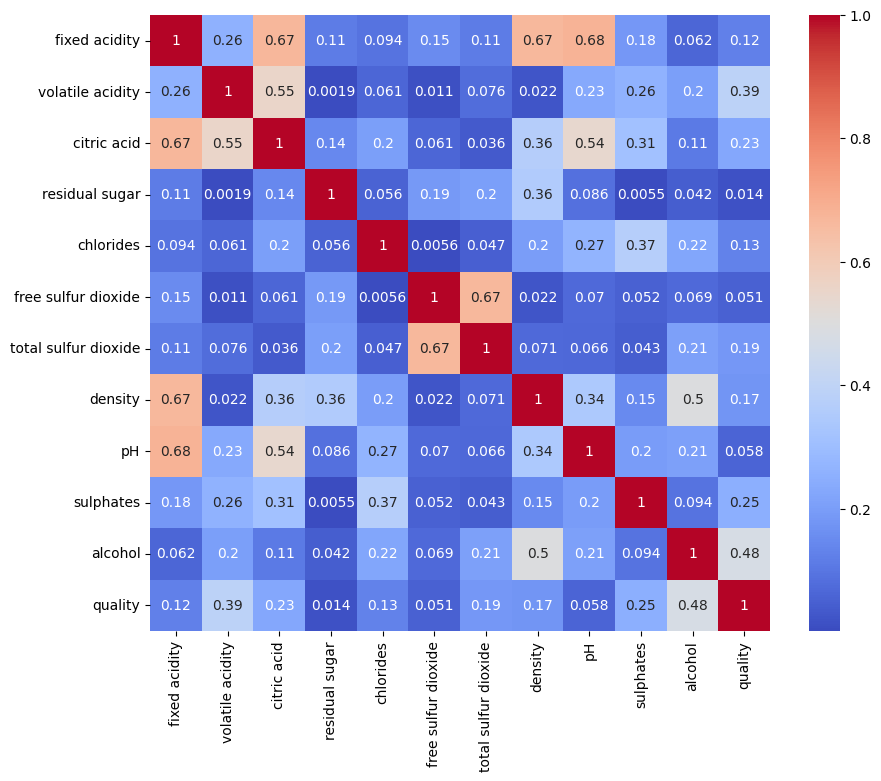

Highly correlated features to drop: []


In [ ]:
#Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
corr_matrix = df.corr().abs()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)


In [ ]:
#Mutual Information (MI)
from sklearn.feature_selection import mutual_info_classif
X = df.drop("quality", axis=1)
y = df["quality"]
mi = mutual_info_classif(X, y, random_state=1)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_scores)


Mutual Information Scores:
alcohol                 0.182129
volatile acidity        0.139267
sulphates               0.105018
density                 0.091573
total sulfur dioxide    0.071321
citric acid             0.056041
fixed acidity           0.051748
chlorides               0.040722
free sulfur dioxide     0.021786
residual sugar          0.014253
pH                      0.008989
dtype: float64


### WEEK **3**

In [ ]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#FILTER METHODS

#i)Constant features



# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
variances = numeric_df.var()
constant_features = variances[variances == 0].index
print("Constant Features:", constant_features)


Constant Features: Index([], dtype='object')


In [ ]:
#ii)QUASI CONSTANT FEATURES

threshold = 0.01
quasi_constant_features = variances[variances < threshold].index
print("Quasi-Constant Features:", quasi_constant_features)

Quasi-Constant Features: Index([], dtype='object')



Correlation with SalePrice:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenA

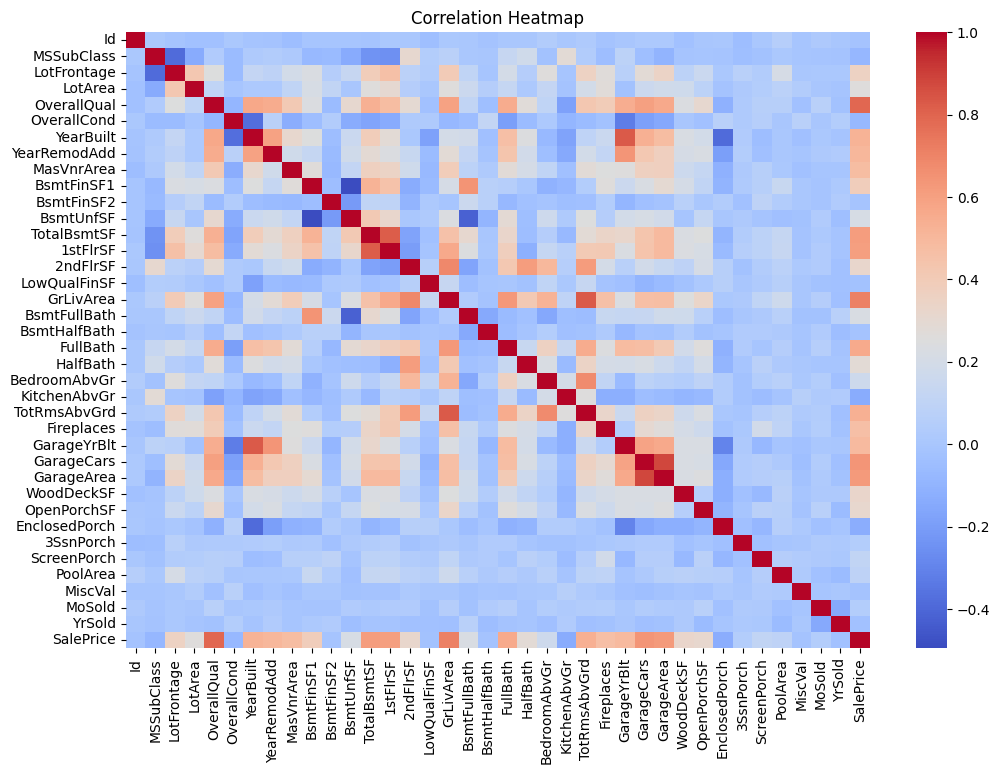

In [ ]:
#iii)Correlation
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Show correlation with target (SalePrice)
target_corr = corr_matrix["SalePrice"].sort_values(ascending=False)
print("\nCorrelation with SalePrice:\n", target_corr)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder

# Make a copy to avoid modifying original
df_copy = df.copy()

# Encode categorical features
for col in df_copy.select_dtypes(include=['object']).columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# Handle missing values (fill with median for numeric, mode for categorical)
for col in df_copy.columns:
    if df_copy[col].dtype in ['int64', 'float64']:
        df_copy[col] = df_copy[col].fillna(df_copy[col].median())
    else:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

# Separate features and target
X = df_copy.drop("SalePrice", axis=1)
y = df_copy["SalePrice"]

# Calculate Mutual Information
mi_scores = mutual_info_regression(X, y, random_state=0)

# Create a DataFrame of scores
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("\nMutual Information Scores:\n", mi_df)



Mutual Information Scores:
          Feature  MI Score
17   OverallQual  0.562351
12  Neighborhood  0.508867
46     GrLivArea  0.484079
19     YearBuilt  0.370343
61    GarageCars  0.368134
..           ...       ...
69     3SsnPorch  0.000000
71      PoolArea  0.000000
74   MiscFeature  0.000000
77        YrSold  0.000000
76        MoSold  0.000000

[80 rows x 2 columns]


In [ ]:
#v)CHI SQUARE
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
# Create a contingency table
contingency_table = pd.crosstab(df['Neighborhood'], df['GarageFinish'])

print(contingency_table)


GarageFinish  Fin  RFn  Unf
Neighborhood               
Blmngtn        16    1    0
Blueste         2    0    0
BrDale          0    0   15
BrkSide         2    3   43
ClearCr        10    4   13
CollgCr        33   85   30
Crawfor        11    4   36
Edwards        15   10   53
Gilbert        57   19    3
IDOTRR          1    3   25
MeadowV         3    3    6
Mitchel        11   10   23
NAmes          26   72  121
NPkVill         0    4    5
NWAmes         17   34   22
NoRidge        20   19    2
NridgHt        37   39    1
OldTown         2    2   97
SWISU           1    2   17
Sawyer          8   15   48
SawyerW        10   24   24
Somerst        28   42   16
StoneBr        16    9    0
Timber         22   13    3
Veenker         4    5    2


In [ ]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
if p < 0.05:
    print("\nThere is a significant association between Neighborhood and GarageFinish.")
else:
    print("\nThere is no significant association between Neighborhood and GarageFinish.")


Chi-Square Statistic: 13.355630515001746
p-value: 0.0012585245232290144
Degrees of Freedom: 2
Expected Frequencies:
[[ 58.96062992  27.02362205 226.01574803]
 [109.03937008  49.97637795 417.98425197]]

There is a significant association between Neighborhood and GarageFinish.


In [ ]:
#vi)Anova
import pandas as pd
from scipy import stats

# Load dataset (replace with your CSV file path or other source)
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv')  # Make sure this file contains GrLivArea & Neighborhood columns

continuous_feature = 'GarageFinish'
categorical_feature = 'Neighborhood'

# Create list of groups based on each neighborhood's GrLivArea
groups = [
    df[df[categorical_feature] == neighborhood][continuous_feature]
    for neighborhood in df[categorical_feature].unique()
]

# Perform ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_val}")

if p_val < 0.05:
    print("\nThere is a significant difference in 'GarageFinish' across the different Neighborhoods.")
else:
    print("\nThere is no significant difference in 'GarageFinish' across the different Neighborhoods.")


ANOVA F-statistic: nan
ANOVA p-value: nan

There is no significant difference in 'GarageFinish' across the different Neighborhoods.


DATASET-2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/titanic_train.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

#i)Constant features
numeric_df = df.select_dtypes(include=['number'])
variances = numeric_df.var()
constant_features = variances[variances == 0].index
print("Constant Features:", constant_features)


Constant Features: Index([], dtype='object')


In [ ]:
#QUASI CONSTANT FEATURES

threshold = 0.01
quasi_constant_features = variances[variances < threshold].index
print("Quasi-Constant Features:", quasi_constant_features)

Quasi-Constant Features: Index([], dtype='object')


In [ ]:
#Correlation
import pandas as pd
import seaborn as sns
df = sns.load_dataset("titanic")
df.columns = df.columns.str.lower()
print(df.head())
print(df.info())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [ ]:
#Mutual information
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()

# Encode categorical columns
for col in df_copy.select_dtypes(include=['object', 'category']).columns:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col].astype(str))

# Fill missing values
for col in df_copy.columns:
    if df_copy[col].dtype in ['int64', 'float64']:
        df_copy[col] = df_copy[col].fillna(df_copy[col].median())
    else:
        df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])

# Features and target
X = df_copy.drop("survived", axis=1)
y = df_copy["survived"]

# Mutual Information
mi_scores = mutual_info_classif(X, y, random_state=0)

mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("\nMutual Information Scores:\n", mi_df)



Mutual Information Scores:
         Feature  MI Score
12        alive  0.666473
9    adult_male  0.165145
8           who  0.150569
1           sex  0.142969
5          fare  0.112926
0        pclass  0.092062
13        alone  0.054570
7         class  0.047906
2           age  0.044987
3         sibsp  0.041431
10         deck  0.037819
11  embark_town  0.015795
6      embarked  0.011724
4         parch  0.000000


In [ ]:
#CHI SQUARE
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

Categorical columns: Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [ ]:
contingency_table = pd.crosstab(df['Sex'], df['Embarked'])

print(contingency_table)

Embarked   C   Q    S
Sex                  
female    73  36  203
male      95  41  441


In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")
if p < 0.05:
    print("\nThere is a significant association between Sex and Embarked.")
else:
    print("\nThere is no significant association between Sex and Embarked.")

Chi-Square Statistic: 13.355630515001746
p-value: 0.0012585245232290144
Degrees of Freedom: 2
Expected Frequencies:
[[ 58.96062992  27.02362205 226.01574803]
 [109.03937008  49.97637795 417.98425197]]

There is a significant association between Sex and Embarked.


In [ ]:
#Anova
from scipy import stats
continuous_feature = 'age'
categorical_feature = 'class'

# Drop NaN values for the selected features
anova_df = df[[continuous_feature, categorical_feature]].dropna()

groups = [
    anova_df[anova_df[categorical_feature] == category][continuous_feature]
    for category in anova_df[categorical_feature].unique()
]

f_stat, p_val = stats.f_oneway(*groups)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_val}")

if p_val < 0.05:
    print(f"\nThere is a significant difference in '{continuous_feature}' across the different {categorical_feature} categories.")
else:
    print(f"\nThere is no significant difference in '{continuous_feature}' across the different {categorical_feature} categories.")


ANOVA F-statistic: 57.443484340676214
ANOVA p-value: 7.487984171959904e-24

There is a significant difference in 'age' across the different class categories.


DATASET -3


In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/Santander Customer Satisfaction_train.csv")

print(df.shape)
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(76020, 371)
   ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0    

In [ ]:
#Constant features
constant_features = [col for col in df.columns if df[col].nunique() == 1]

print(f"Constant features ({len(constant_features)}): {constant_features}")


Constant features (34): ['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [ ]:
#Quasi constant features
quasi_constant_features = [
    col for col in df.columns
    if 0 < df[col].nunique() / df.shape[0] <= 0.01
]

print(f"Quasi-constant features ({len(quasi_constant_features)}): {quasi_constant_features}")


Quasi-constant features (336): ['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var40_comer_ult1', 'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1', 'imp_op_var40_efect_ult3', 'imp_op_var40_ult1', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3', 'imp_op_var39_efect_ult1', 'imp_op_var39_efect_ult3', 'imp_sal_var16_ult1', 'ind_var1_0', 'ind_var1', 'ind_var2_0', 'ind_var2', 'ind_var5_0', 'ind_var5', 'ind_var6_0', 'ind_var6', 'ind_var8_0', 'ind_var8', 'ind_var12_0', 'ind_var12', 'ind_var13_0', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13_largo_0', 'ind_var13_largo', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var13', 'ind_var14_0', 'ind_var14', 'ind_var17_0', 'ind_var17', 'ind_var18_0', 'ind_var18', 'ind_var19', 'ind_var20_0', 'ind_var20', 'ind_var24_0', 'ind_var24', 'ind_var25_cte', 'ind_var26_0', 'ind_var26_cte', 'ind_var26', 'ind_var25_0', 'ind_var25', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29_0', 'ind_var29', 'ind_var30_0', 'ind_var30', 'ind_var3

In [ ]:
#Correlation
corr_matrix = df.corr()
target_corr = corr_matrix["TARGET"].sort_values(ascending=False)

print("\nCorrelation with TARGET:\n", target_corr)



Correlation with TARGET:
 TARGET                           1.000000
var36                            0.102919
var15                            0.101322
ind_var8_0                       0.046665
num_var8_0                       0.046622
                                   ...   
num_reemb_var33_hace3                 NaN
num_trasp_var17_out_hace3             NaN
num_trasp_var33_out_hace3             NaN
saldo_var2_ult1                       NaN
saldo_medio_var13_medio_hace3         NaN
Name: TARGET, Length: 371, dtype: float64


In [ ]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
X = df.drop("TARGET", axis=1)
y = df["TARGET"]
mi_scores = mutual_info_classif(X, y, random_state=0)
mi_df = pd.DataFrame({"Feature": X.columns, "MI Score": mi_scores})
mi_df = mi_df.sort_values(by="MI Score", ascending=False)

print("\nTop Mutual Information Scores:\n", mi_df)


KeyboardInterrupt: 

In [ ]:
#Chi Square
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

chi_scores, p_values = chi2(X_scaled, y)

chi_df = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores, "p-value": p_values})
chi_df = chi_df.sort_values(by="Chi2 Score", ascending=False)

print("\nTop Chi-Square Scores:\n", chi_df)



Top Chi-Square Scores:
                            Feature  Chi2 Score        p-value
281            num_meses_var5_ult3  474.584918  3.221568e-105
25                        ind_var5  468.257507  7.672721e-104
64                       ind_var30  455.821225  3.901880e-101
194                          var36  451.071536  4.216191e-100
28                      ind_var8_0  160.110889   1.070091e-36
..                             ...         ...            ...
308          num_reemb_var33_hace3         NaN            NaN
316      num_trasp_var17_out_hace3         NaN            NaN
320      num_trasp_var33_out_hace3         NaN            NaN
328                saldo_var2_ult1         NaN            NaN
350  saldo_medio_var13_medio_hace3         NaN            NaN

[370 rows x 3 columns]


In [ ]:
#Anova
from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X, y)

anova_df = pd.DataFrame({"Feature": X.columns, "F Score": f_scores, "p-value": p_values})
anova_df = anova_df.sort_values(by="F Score", ascending=False)

print("\nTop ANOVA F-Scores:\n", anova_df)



Top ANOVA F-Scores:
                            Feature      F Score        p-value
64                       ind_var30  1745.255659   0.000000e+00
281            num_meses_var5_ult3  1708.340128   0.000000e+00
139                      num_var30  1482.100843  3.833949e-321
159                      num_var42  1425.940751  3.612448e-309
25                        ind_var5  1418.577470  1.344170e-307
..                             ...          ...            ...
308          num_reemb_var33_hace3          NaN            NaN
316      num_trasp_var17_out_hace3          NaN            NaN
320      num_trasp_var33_out_hace3          NaN            NaN
328                saldo_var2_ult1          NaN            NaN
350  saldo_medio_var13_medio_hace3          NaN            NaN

[370 rows x 3 columns]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 22  23  57  58  59  60  81  85  86 132 133 134 135 156 162 163 180 181
 190 193 221 223 235 239 245 249 262 263 304 308 316 320 328 350] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# WEEK-**4**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv'

df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv')

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])  # most frequent in each categorical col

# Now convert categoricals to dummies
df = pd.get_dummies(df)

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Wrapper Methods
#1. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))


Selected features by RFE: ['Neighborhood_NoRidge', 'Condition2_PosA', 'Condition2_PosN', 'RoofMatl_ClyTile', 'BsmtQual_Ex', 'KitchenQual_Ex', 'GarageQual_Ex', 'GarageCond_Ex', 'PoolQC_Ex', 'SaleType_Con']


In [7]:
#2. Recursive Feature Elimination with Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, cv=KFold(5), scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

print("Optimal number of features:", rfecv.n_features_)
selected_features = X_train.columns[rfecv.support_]
print("Selected features by RFECV:", list(selected_features))


Optimal number of features: 185
Selected features by RFECV: ['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM', 'Alley_Grvl', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Gtl', 'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'C

In [8]:
#3.Forward Selection
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=10, direction='forward')
sfs.fit(X_train, y_train)

selected_features = X_train.columns[sfs.get_support()]
print("Selected features by Forward SFS:", list(selected_features))


Selected features by Forward SFS: ['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'GrLivArea', 'BsmtFullBath', 'Neighborhood_NoRidge', 'BsmtQual_Ex', 'BsmtExposure_No', 'KitchenQual_Ex']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

# Step 1: Load your dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning /ML LAB /Datasets/house_price_train.csv')  # update path as needed

# Step 2: Handle missing data for numeric and categorical columns separately
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Step 3: Convert categorical variables to dummy variables
df = pd.get_dummies(df)

# Step 4: Separate features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Step 5: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Now run backward Sequential Feature Selector
model = LinearRegression()
sbs = SequentialFeatureSelector(model, n_features_to_select=10, direction='backward')
sbs.fit(X_train, y_train)

selected_features = X_train.columns[sbs.get_support()]
print("Selected features by Backward SFS:", list(selected_features))


In [10]:
#Lasso Regression (L1 Regularization)
from sklearn.linear_model import LassoCV
import numpy as np

# Lasso with cross-validated alpha (regularization strength)
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Coefficients
coef = pd.Series(lasso.coef_, index=X_train.columns)
selected_features = coef[coef != 0].index.tolist()

print("Selected features by Lasso:")
print(selected_features)


Selected features by Lasso:
['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'MiscVal']


In [11]:
#2. Ridge Regression (L2 Regularization)
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=5)
ridge.fit(X_train, y_train)

coef = pd.Series(ridge.coef_, index=X_train.columns)
top_features = coef.abs().sort_values(ascending=False).head(10).index.tolist()

print("Top 10 features by Ridge coefficients magnitude:")
print(top_features)


Top 10 features by Ridge coefficients magnitude:
['RoofMatl_ClyTile', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition2_PosN', 'PoolQC_Ex', 'Neighborhood_NridgHt', 'BsmtQual_Ex', 'KitchenQual_Ex', 'PoolQC_Gd', 'Exterior2nd_ImStucc']


In [12]:
#3. Elastic Net (Combination of L1 and L2)
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(cv=5, random_state=42)
elastic.fit(X_train, y_train)

coef = pd.Series(elastic.coef_, index=X_train.columns)
selected_features = coef[coef != 0].index.tolist()

print("Selected features by Elastic Net:")
print(selected_features)


Selected features by Elastic Net:
['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']


Top 10 features by Random Forest importance:
['OverallQual', 'GrLivArea', 'TotalBsmtSF', '2ndFlrSF', 'BsmtFinSF1', '1stFlrSF', 'LotArea', 'GarageArea', 'GarageCars', 'YearBuilt']


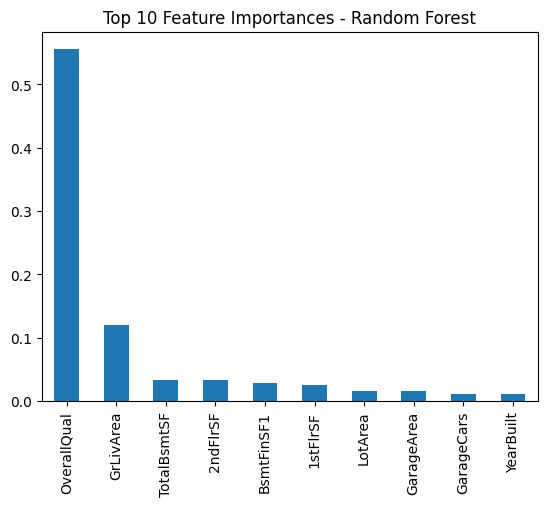

In [13]:
#4. Tree-based Feature Importance (Random Forest)
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X_train.columns)
selected_features = importances.sort_values(ascending=False).head(10).index.tolist()

print("Top 10 features by Random Forest importance:")
print(selected_features)

# Optional plot
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()


In [ ]:
#1. PCA (Principal Component Analysis)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('house_train.csv')

# Handle missing values separately for numeric and categorical
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# One-hot encode categorical variables
df = pd.get_dummies(df)

# Features and target
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features before PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA - reduce to 10 components (adjust as needed)
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio of PCA components:")
print(pca.explained_variance_ratio_)

print(f"Shape of original features: {X_train.shape}")
print(f"Shape after PCA: {X_train_pca.shape}")
